# Exploratory Data Analysis: NVIDIA Stock Volatility (2014–2024)


This notebook presents an exploratory data analysis (EDA) of NVIDIA's stock data from 2014 to 2024, with a particular focus on stock trends and volatility patterns. We examine price movements, returns, and technical indicators such as Bollinger Bands and rolling volatility.


In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num
sns.set(style="whitegrid")

In [21]:
# Here we delete the dataset from drive if it exist in the drive.
import os

file_to_delete = '/content/NVIDIA_Stock_Volatility_2014_2024.csv'

if os.path.exists(file_to_delete):
    os.remove(file_to_delete)
    print(f"{file_to_delete} has been deleted.")
else:
    print(f"{file_to_delete} doesn't exist.")

/content/NVIDIA_Stock_Volatility_2014_2024.csv has been deleted.


In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
from google.colab import files
uploaded = files.upload()

Saving NVIDIA_Stock_Volatility_2014_2024.csv to NVIDIA_Stock_Volatility_2014_2024.csv


In [24]:
df = pd.read_csv('/content/NVIDIA_Stock_Volatility_2014_2024.csv')

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

In [26]:
# Ensures that the specified columns contain numeric values (like floats or integers) rather than strings or other types.
columns_to_fix = ['Close', 'Open', 'High', 'Low', 'Volume', 'Daily_Return',
                  'Rolling_Volatility', 'ATR', 'Rolling_Mean', 'Upper_Band', 'Lower_Band']
for col in columns_to_fix:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with NaNs in critical columns
df_clean = df.dropna(subset=['Year', 'Daily_Return', 'Rolling_Volatility'])


In [27]:
# Load dataset
df = pd.read_csv("NVIDIA_Stock_Volatility_2014_2024.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df = df.sort_values('Date').reset_index(drop=True)
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541 entries, 0 to 2540
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2541 non-null   datetime64[ns]
 1   Close               2541 non-null   float64       
 2   High                2541 non-null   float64       
 3   Low                 2541 non-null   float64       
 4   Open                2541 non-null   float64       
 5   Volume              2541 non-null   int64         
 6   Daily_Return        2541 non-null   float64       
 7   Rolling_Volatility  2541 non-null   float64       
 8   ATR                 2541 non-null   float64       
 9   Rolling_Mean        2541 non-null   float64       
 10  Upper_Band          2541 non-null   float64       
 11  Lower_Band          2541 non-null   float64       
 12  Year                2541 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(1), int

,Date,Close,High,Low,Open,Volume,Daily_Return,Rolling_Volatility,ATR,Rolling_Mean,Upper_Band,Lower_Band,Year
0,2014-01-31,0.370194,0.372316,0.365242,0.365478,335348000,-0.001272,0.016288,0.007461,0.372964,0.385216,0.360713,2014
1,2014-02-03,0.365242,0.373259,0.363827,0.372787,431728000,-0.013376,0.016343,0.007293,0.372752,0.385398,0.360106,2014
2,2014-02-04,0.367364,0.368071,0.363120,0.365006,280692000,0.005810,0.016091,0.006787,0.372398,0.385240,0.359557,2014
3,2014-02-05,0.364063,0.365949,0.361233,0.364770,214676000,-0.008986,0.015657,0.006838,0.371573,0.384325,0.358821,2014
4,2014-02-06,0.368779,0.369722,0.364063,0.364535,168380000,0.012953,0.015622,0.006990,0.370724,0.381627,0.359821,2014


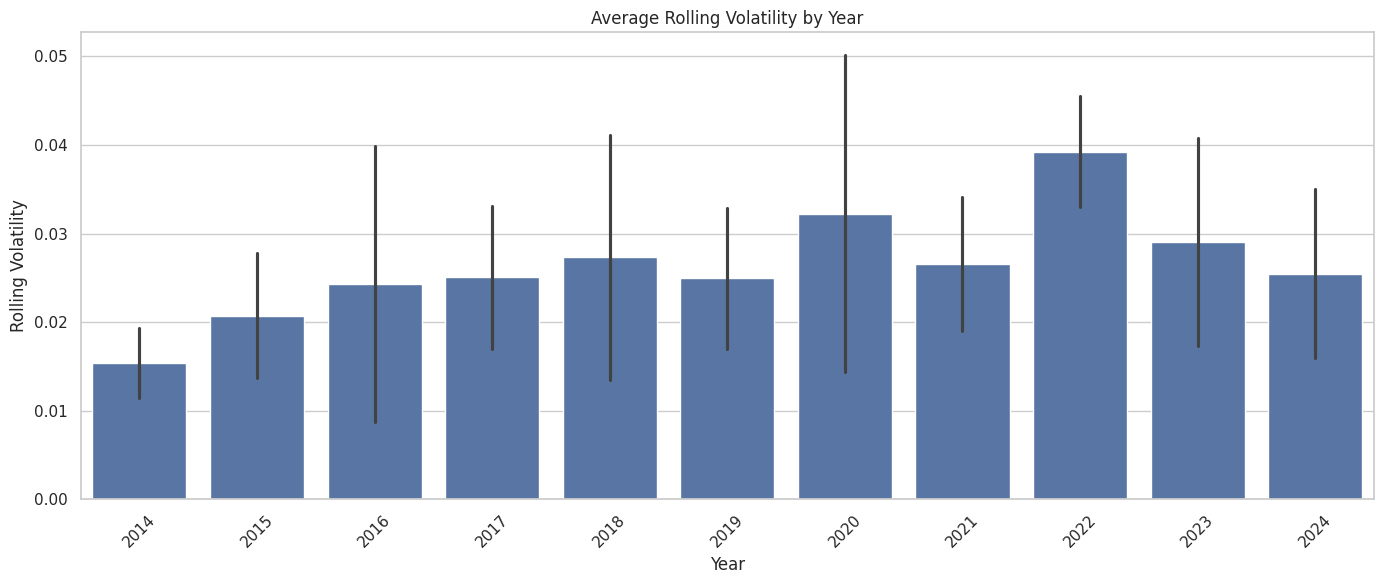

In [28]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df_clean, x='Year', y='Rolling_Volatility', estimator=np.mean, errorbar='sd')
plt.title('Average Rolling Volatility by Year')
plt.xlabel('Year')
plt.ylabel('Rolling Volatility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

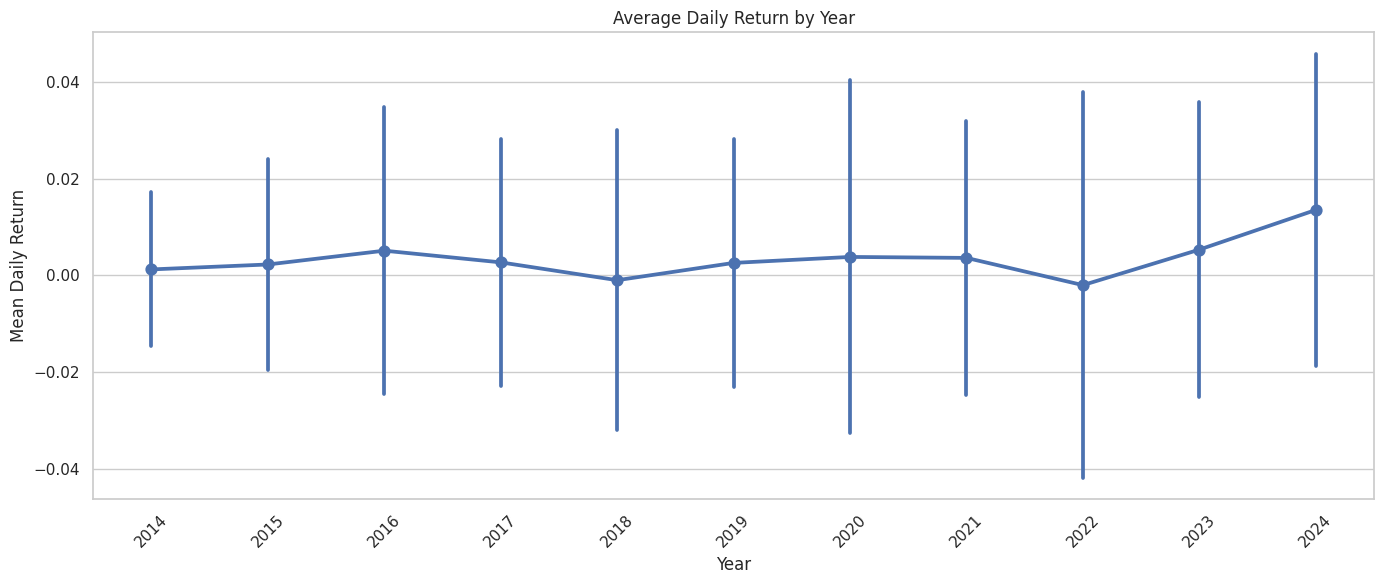

In [29]:
plt.figure(figsize=(14, 6))
sns.pointplot(data=df_clean, x='Year', y='Daily_Return', estimator=np.mean, errorbar='sd')
plt.title('Average Daily Return by Year')
plt.xlabel('Year')
plt.ylabel('Mean Daily Return')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Price Trends and Volatility

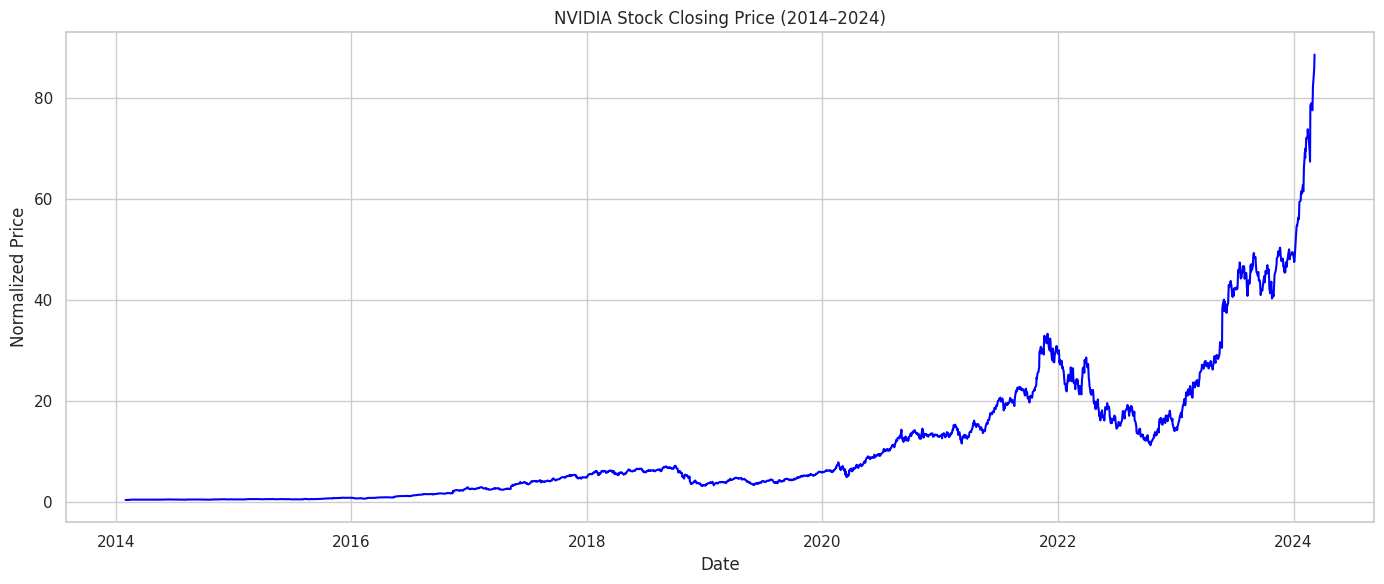

In [30]:
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('NVIDIA Stock Closing Price (2014–2024)')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.tight_layout()
plt.show()

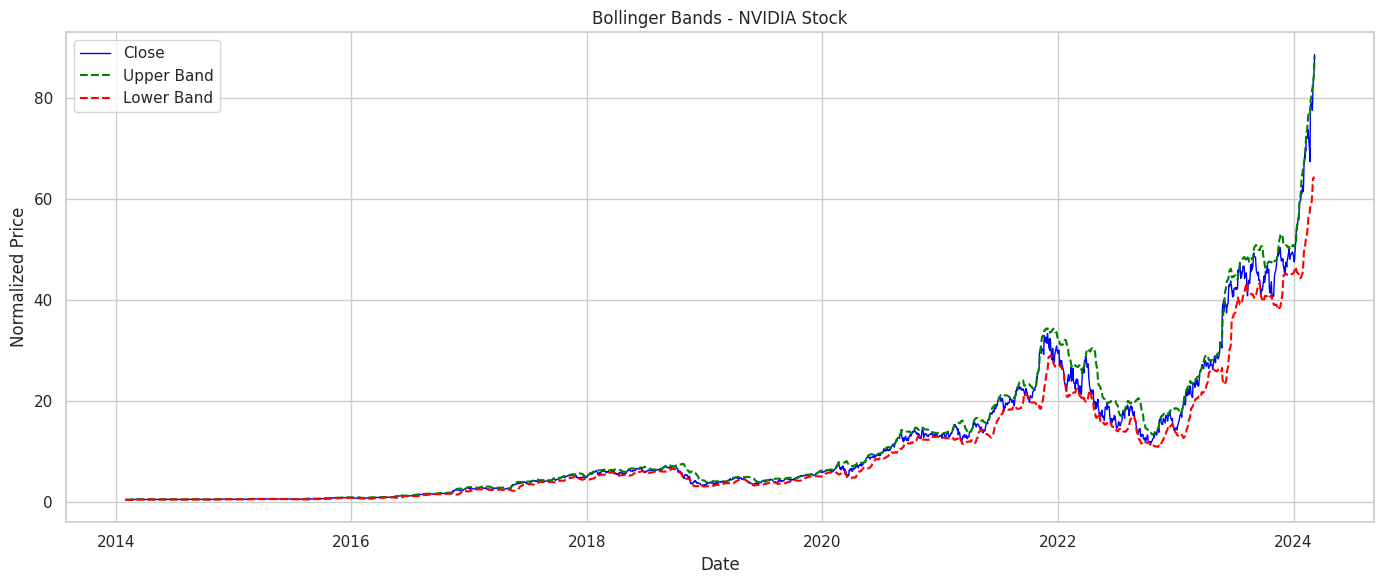

In [31]:

bb_df = df[['Date', 'Close', 'Upper_Band', 'Lower_Band']].copy()
bb_df = bb_df.replace([np.inf, -np.inf], np.nan).dropna()
bb_df['Upper_Band'] = pd.to_numeric(bb_df['Upper_Band'], errors='coerce')
bb_df['Lower_Band'] = pd.to_numeric(bb_df['Lower_Band'], errors='coerce')
bb_df['Close'] = pd.to_numeric(bb_df['Close'], errors='coerce')
bb_df = bb_df.dropna()

plt.figure(figsize=(14, 6))
plt.plot(bb_df['Date'], bb_df['Close'], label='Close', color='blue', linewidth=1)
plt.plot(bb_df['Date'], bb_df['Upper_Band'], label='Upper Band', linestyle='--', color='green')
plt.plot(bb_df['Date'], bb_df['Lower_Band'], label='Lower Band', linestyle='--', color='red')
plt.title('Bollinger Bands - NVIDIA Stock')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.tight_layout()
plt.show()


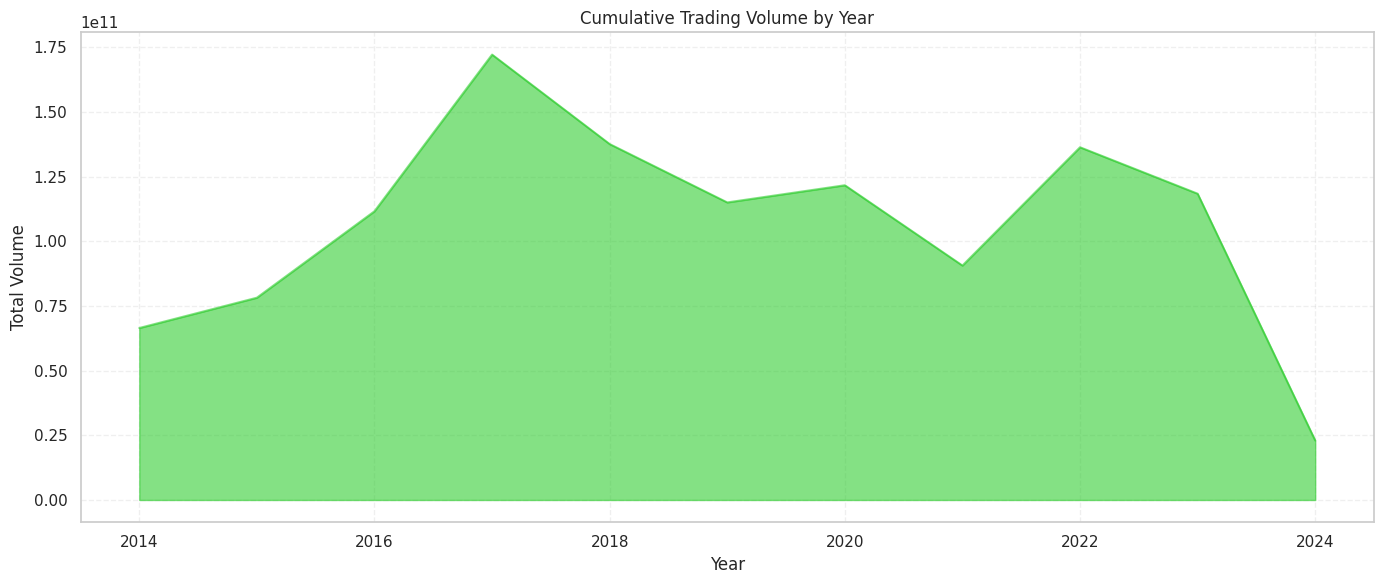

In [32]:
plt.figure(figsize=(14, 6))
df_clean.groupby('Year')['Volume'].sum().plot(kind='area', color='limegreen', alpha=0.6)
plt.title('Cumulative Trading Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

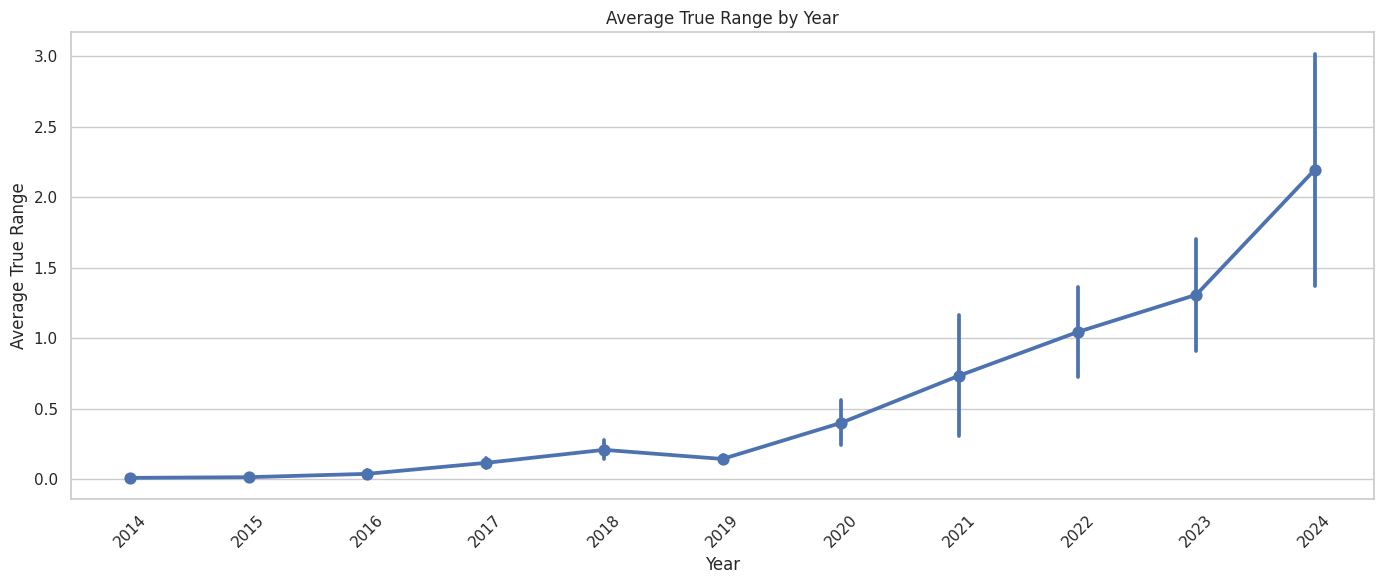

In [33]:
plt.figure(figsize=(14, 6))
sns.pointplot(data=df_clean, x='Year', y='ATR', estimator=np.mean, errorbar='sd')
plt.title('Average True Range by Year')
plt.xlabel('Year')
plt.ylabel('Average True Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

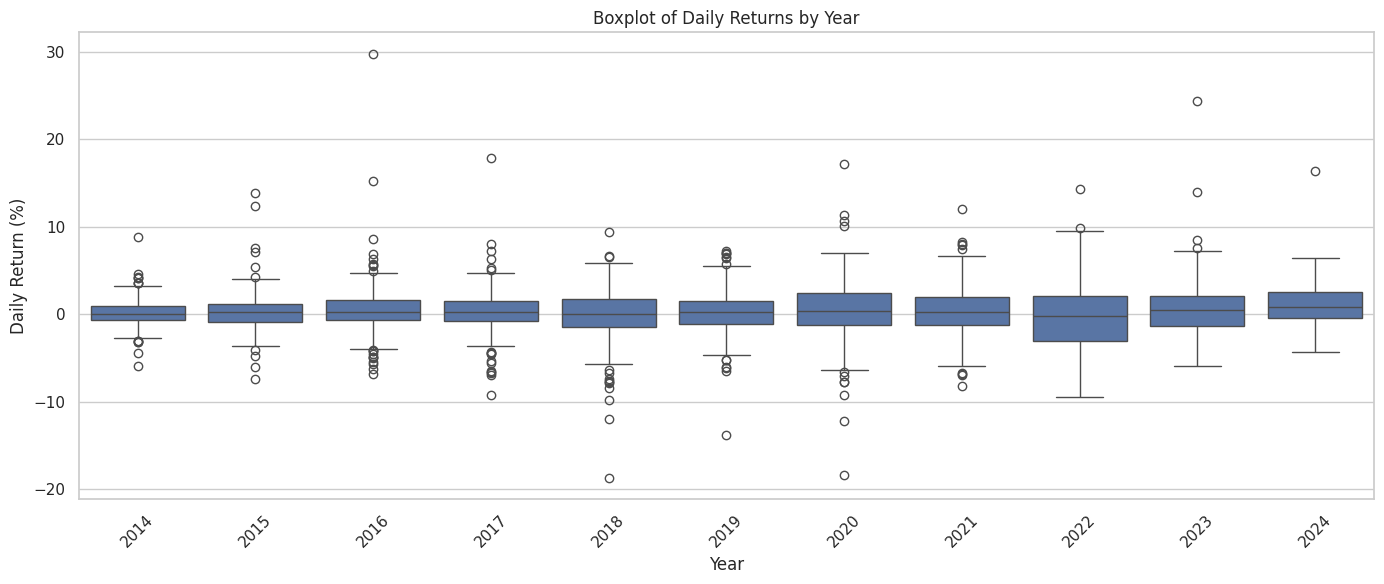

In [34]:
# Convert daily returns to percentages
df['Daily_Return_Pct'] = df['Daily_Return'] * 100

# Create the boxplot with percentage returns
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Daily_Return_Pct', data=df)
plt.title('Boxplot of Daily Returns by Year')
plt.xlabel('Year')
plt.ylabel('Daily Return (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


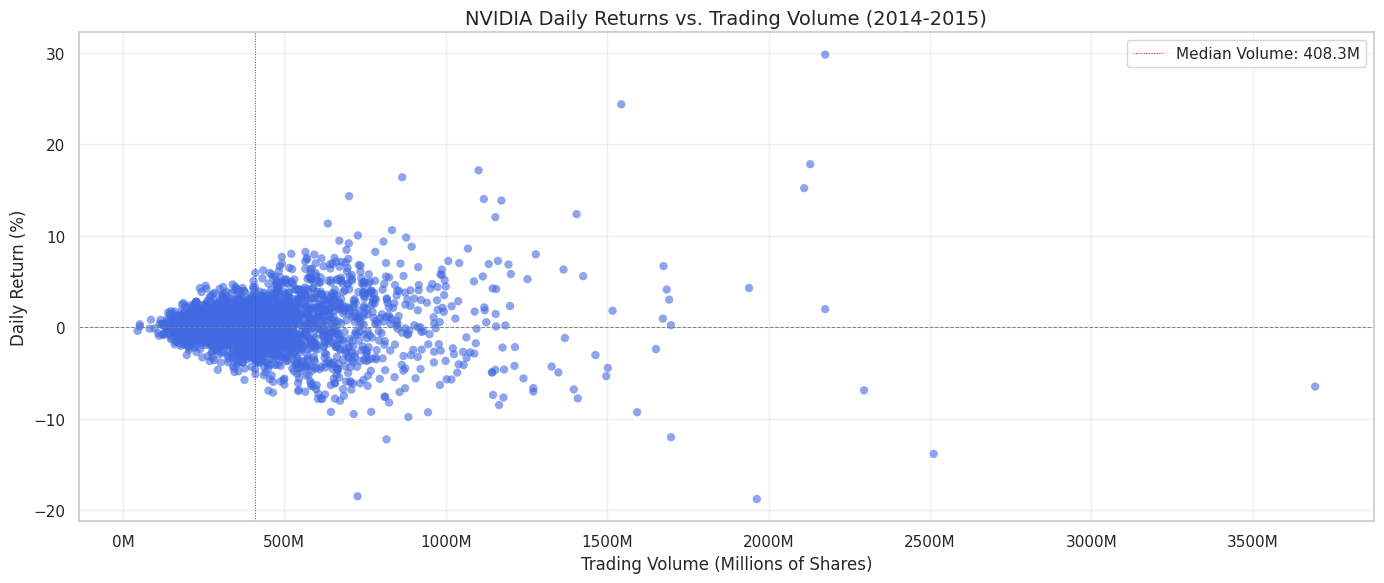

In [35]:
# Convert daily returns to percentages
df['Daily_Return_Pct'] = df['Daily_Return'] * 100

# Create scatter plot
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Volume', y='Daily_Return_Pct', data=df,
                alpha=0.6, color='royalblue', edgecolor='none')

# Add labels and title
plt.title('NVIDIA Daily Returns vs. Trading Volume (2014-2015)', fontsize=14)
plt.xlabel('Trading Volume (Millions of Shares)', fontsize=12)
plt.ylabel('Daily Return (%)', fontsize=12)

# Format x-axis to show volume in millions
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Add reference lines
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(x=df['Volume'].median(), color='red', linestyle=':', linewidth=0.7,
            label=f'Median Volume: {df["Volume"].median()/1e6:.1f}M')

# Add grid and legend
plt.grid(True, alpha=0.3)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

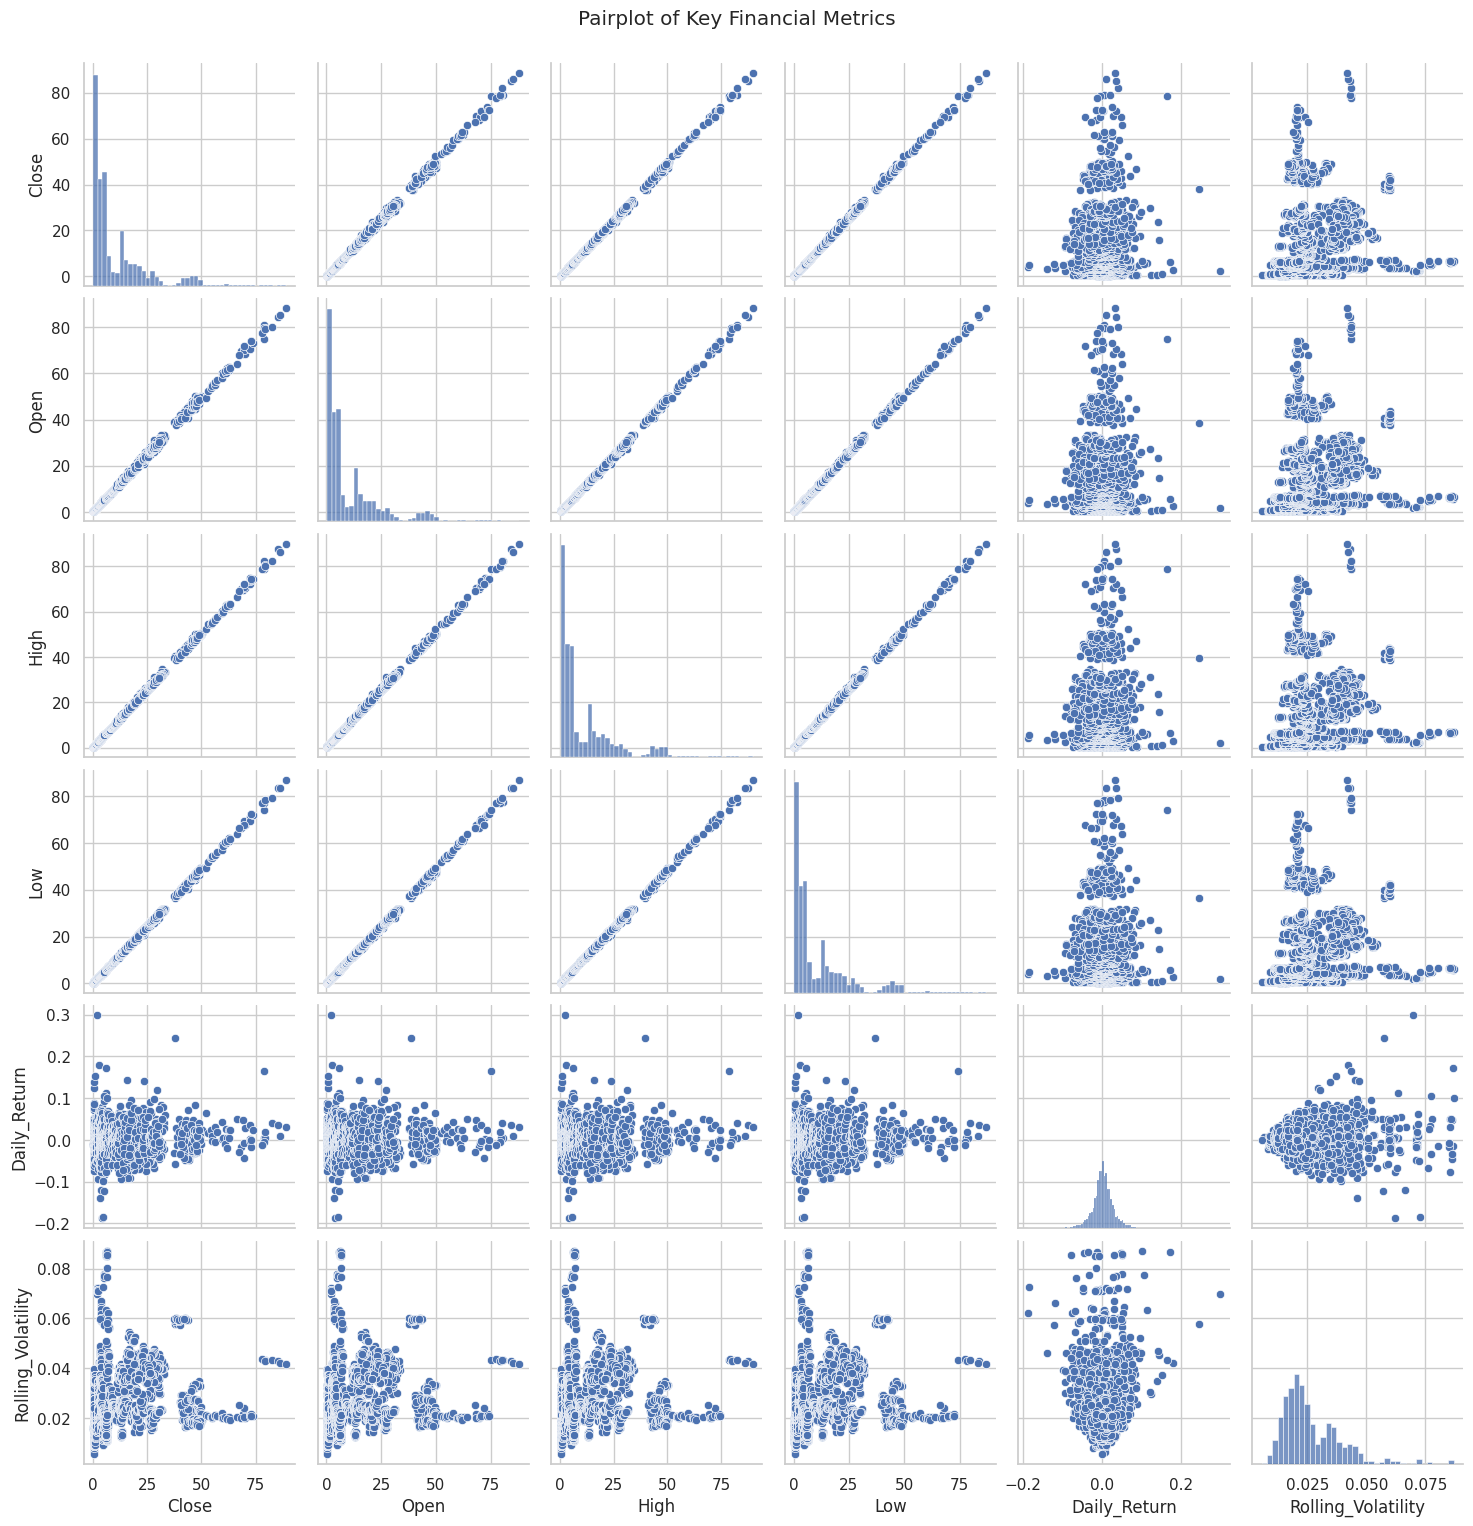

In [36]:
sns.pairplot(df_clean[['Close', 'Open', 'High', 'Low', 'Daily_Return', 'Rolling_Volatility']])
plt.suptitle('Pairplot of Key Financial Metrics', y=1.02)
plt.show()